In [1]:
import pandas as pd
import numpy as np
import time

df = pd.read_csv('2018_Incident_Report.csv')

seed = 135

In [2]:
df = df[np.isfinite(df['Latitude'])]
df = df[np.isfinite(df['Longitude'])]
df = df[df.Latitude != 0]
df = df[df.Longitude != 0]

rows = len(df.index)
round_rows = round(rows*1)
print('Total observations: ',rows)
print('Fraction of observations tested: ',round_rows)

df = df.sample(frac=1)

df_sm = df[:round_rows]

print('Max Lat: ', df_sm['Latitude'].max())
print('Max Long: ', df_sm['Longitude'].max())
print('Min Lat: ', df_sm['Latitude'].min())
print('Max Long: ', df_sm['Longitude'].min())

array = df_sm[['Longitude', 'Latitude']].values

Total observations:  84236
Fraction of observations tested:  84236
Max Lat:  36.4
Max Long:  -86.52
Min Lat:  35.97
Max Long:  -87.04


In [3]:
#### Existing Precinct Station Locations ####

police_long = [36.15171,36.18972,36.13706,36.15912,
              36.20321,36.08978,36.17756,36.2733]

police_lat = [-86.8554,-86.81816,-86.78866,-86.7785,
               -86.74821,-86.68849,-86.61507,-86.69068]

other_long = [36.034759, 35.962711,35.920784,36.022022,
             36.222628,35.975441]

other_lat = [-86.804166, -86.673531,-86.872467,-86.580271,
            -86.512293,-87.129706]

print(array)

[[-86.73   36.28 ]
 [-86.6    36.22 ]
 [-86.87   36.15 ]
 ...
 [-86.69   36.09 ]
 [-86.721  36.282]
 [-86.628  36.116]]


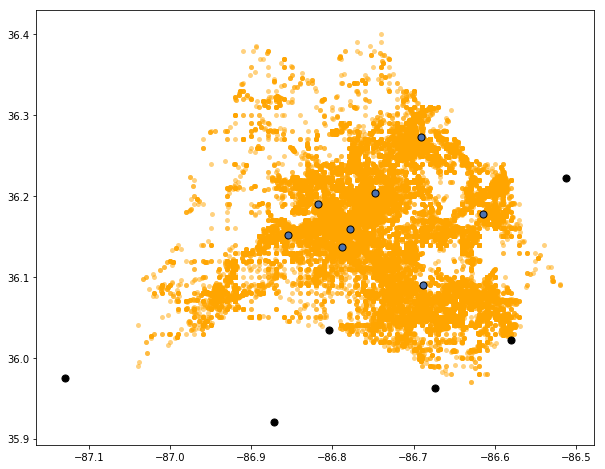

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np


%matplotlib inline
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 25, 'linewidths':0}

data = array
plt.figure(figsize=(10,8))
plt.scatter(data.T[0], data.T[1], c='orange', **plot_kwds)
plt.scatter(police_lat, police_long, c='b',s=50,edgecolors='black')
plt.scatter(other_lat, other_long, c='black',s=50,edgecolors='black')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(True)
frame.axes.get_yaxis().set_visible(True)

In [5]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.figure(figsize=(10,8))
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(True)
    frame.axes.get_yaxis().set_visible(True)
    end_time = time.time()
    print('Cluster took:', round(end_time-start_time),'seconds')
    #plt.text(-0.5, 0.7, s = (end_time - start_time), fontsize=14)
    
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)))

Cluster took: 5 seconds


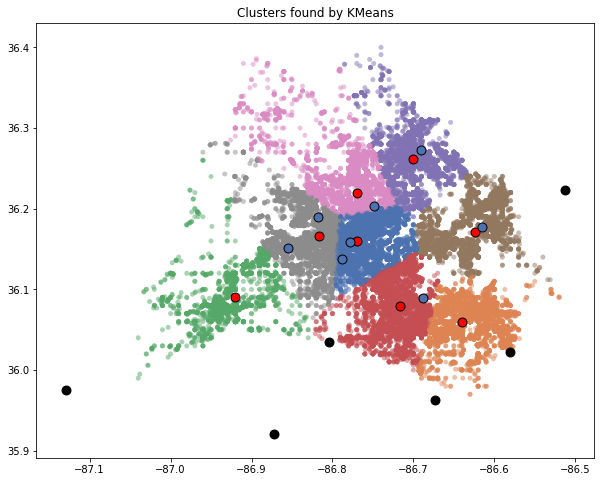

[[-86.77   36.22 ]
 [-86.77   36.16 ]
 [-86.64   36.06 ]
 [-86.624  36.171]
 [-86.92   36.09 ]
 [-86.7    36.261]
 [-86.716  36.08 ]
 [-86.817  36.166]]


In [6]:
%matplotlib inline

KMeans_Centroids = cluster.KMeans(n_clusters= 8,
                                 random_state = seed).fit_predict(data)

X = array
y = KMeans_Centroids
clf = NearestCentroid(metric = 'manhattan')
clf.fit(X,y)

cent = clf.centroids_
lat_cent = np.hsplit(cent,2)[:1]
long_cent = np.hsplit(cent,2)[1:]


p = plot_clusters(data, cluster.KMeans,(), {'n_clusters':8})
plt.scatter(lat_cent,long_cent, c='red',s=80,edgecolors='black')
plt.scatter(police_lat, police_long, c='b',s=80,edgecolors='black')
plt.scatter(other_lat, other_long, c='black',s=80,edgecolors='black')
plt.show()

print(cent)

In [7]:
#from sklearn.cluster import SpectralClustering
#from sklearn import cluster

#clustering = SpectralClustering(n_clusters = 3, assign_labels = "discretize",
#                                random_state = seed).fit(array)

#Spectral_Centroids = cluster.SpectralClustering().fit_predict(data)

#X = array
#y = Spectral_Centroids
#clf = NearestCentroid(metric = 'manhattan')
#clf.fit(X,y)

#cent = clf.centroids_
#lat_cent = np.hsplit(cent,2)[:1]
#long_cent = np.hsplit(cent,2)[1:]

In [8]:
#%matplotlib inline
#p = plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':8})
#plt.scatter(lat_cent,long_cent, c='red',s=40,edgecolors='black')
#plt.scatter(police_lat, police_long, c='b',s=40,edgecolors='black')
#plt.show()
#print(cent)